In [17]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost.sklearn import  XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_validate

In [40]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, log_loss, f1_score, accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Input, Activation
from keras import optimizers, callbacks 


from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization,Add,Dropout
from keras.models import Model, load_model

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils, plot_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
import collections

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

In [19]:
train = pd.read_csv('stats/train_final.csv')
test = pd.read_csv('stats/test_final.csv')
sample_sub = pd.read_csv('../data/sample_submission.csv')
print('train shape {}'.format(train.shape))
print('test shape {}'.format(test.shape))

train shape (2494, 6094)
test shape (1074, 6093)


In [20]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(train['Crop_Id_Ne']),
                                                 train['Crop_Id_Ne'])
class_weights = list(class_weights)

In [31]:
# y_train= pd.get_dummies(train['Crop_Id_Ne'])
y_train = train['Crop_Id_Ne']

X_train = train.drop(['Field_Id','Crop_Id_Ne', 'Subregion'], axis = 1)
X_train.reset_index(inplace = True, drop= True)
X_train.head()

X_test = test.drop(['Field_Id', 'Subregion'], axis = 1)
X_test.reset_index(inplace = True, drop = True)
X_test.head()

,Area,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9,...,ndre_val112017-08-19,ndre_val122017-08-19,ndre_val132017-08-19,ndre_val142017-08-19,ndre_val152017-08-19,ndre_val162017-08-19,ndre_val172017-08-19,ndre_val182017-08-19,ndre_val192017-08-19,ndre_val202017-08-19
0,1.322590,542.154656,25905.193339,6787.051384,115.070303,2822.003090,110.586359,3690.861375,188.537905,209.696359,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.955864,576.599289,25994.828210,6851.471277,129.908754,2885.489146,211.157832,3755.596272,217.074427,307.864467,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,11.509800,1134.703251,25471.320524,6207.192317,542.636070,2244.871018,441.374963,3115.811832,174.156505,668.386926,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2.697520,7475.429585,9971.677055,654.577639,699.669276,611.523138,423.381817,592.312815,130.491096,454.223988,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4.238030,7110.852861,9809.649838,241.087154,426.193509,241.410082,308.463318,162.173210,158.246127,251.095189,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
## From this source the code https://evgenypogorelov.com/multiclass-xgb-shap.html

# And this one for to understand how it works
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

### Using all bands and indices

In [42]:
i=1
kf = StratifiedKFold(n_splits=3,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train,y_train):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X_train.loc[train_index],X_train.loc[test_index]
    ytr,yvl = y_train[train_index],y_train[test_index]
    
    model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
    model.fit(xtr, ytr)
    pred=model.predict(xvl)
    pred_prob = model.predict_proba(xvl) 
    print('accuracy_score',accuracy_score(yvl,pred))
    print('log loss is : ', log_loss(yvl, pred_prob))
    print('f1 score ', f1_score(yvl, pred, average='weighted'))
    print('conf matrix: ', confusion_matrix(yvl,pred))
    i+=1


1 of kfold 3
accuracy_score 0.9988023952095808
log loss is :  0.0038126469089253667
f1 score  0.9987945583829025
conf matrix:  [[ 48   0   0   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0   0   0]
 [  0   0  31   1   0   0   0   0   0]
 [  0   0   0 179   0   0   0   0   0]
 [  0   0   0   0  95   0   0   0   0]
 [  0   0   0   0   0  49   0   0   0]
 [  0   0   0   0   0   0  89   0   0]
 [  0   0   0   0   0   0   0 314   0]
 [  0   0   0   0   0   0   0   0  26]]

2 of kfold 3
accuracy_score 1.0
log loss is :  0.002378470875835494
f1 score  1.0
conf matrix:  [[ 47   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0]
 [  0   0  32   0   0   0   0   0   0]
 [  0   0   0 179   0   0   0   0   0]
 [  0   0   0   0  94   0   0   0   0]
 [  0   0   0   0   0  49   0   0   0]
 [  0   0   0   0   0   0  89   0   0]
 [  0   0   0   0   0   0   0 314   0]
 [  0   0   0   0   0   0   0   0  26]]

3 of kfold 3
accuracy_score 0.9987908101571947
log loss is :  0.004526

Counter({8: 639, 4: 239, 5: 37, 9: 36, 3: 35, 2: 33, 6: 25, 1: 22, 7: 8})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.097936,0.080756,0.094192,0.089705,0.101035,0.124852,0.101421,0.175363,0.134740
1,6,0.099134,0.081744,0.095345,0.100647,0.102272,0.113995,0.102662,0.180970,0.123231
2,10,0.104698,0.086333,0.100696,0.095899,0.108012,0.105535,0.108424,0.191111,0.099292
3,18,0.103924,0.085694,0.099952,0.095190,0.107213,0.104754,0.107622,0.182266,0.113384
4,23,0.097058,0.082225,0.118540,0.088901,0.100129,0.101941,0.100511,0.177164,0.133532
5,28,0.096353,0.083744,0.117680,0.115881,0.099402,0.116462,0.099781,0.150922,0.119774
6,32,0.099437,0.081994,0.095636,0.091080,0.102584,0.104440,0.102976,0.185047,0.136805
7,35,0.098527,0.083469,0.101614,0.090246,0.101645,0.099314,0.102033,0.179845,0.143308
8,43,0.099767,0.088834,0.102894,0.091382,0.102924,0.114722,0.108924,0.153294,0.137259
9,44,0.105606,0.094034,0.113172,0.096731,0.108949,0.127647,0.115299,0.113210,0.125353


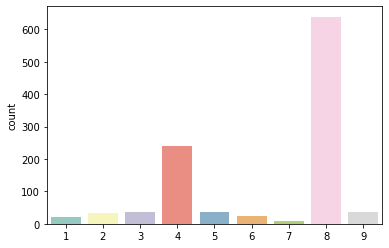

In [43]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [44]:
file_name = 'xgb_all_data_first'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

### Use only the bands

In [51]:
dates = ["2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12", "2017-03-22", "2017-05-31", "2017-06-20", 
        "2017-07-10", "2017-07-15", "2017-08-04", "2017-08-19"]

features = ['red', 'green', 'blue', 'band5', 'band6', 'band7', 'nir', 'band8a', 'band11', 'band12',
           'ndvi', 'reip', 'datt3', 'gemi', 'msbi', 'ccci', 'avi', 'cvi', 'ndsi', 'siwsi', 'savi', 'evi', 'ndre']

mean_columns = []
for date in dates:
    for layer in features:
        mean_columns.append(layer + '_mean'+date)
print(len(mean_columns))

X_train = train[mean_columns]
X_test = test[mean_columns]
y_train = train['Crop_Id_Ne']

253


Counter({8: 452, 4: 257, 7: 134, 5: 116, 1: 48, 6: 38, 3: 27, 9: 2})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.008506,0.000842,0.007064,0.004463,0.005394,0.018700,0.004059,0.896074,0.054898
1,6,0.003278,0.000445,0.002911,0.003778,0.001549,0.018135,0.003774,0.946801,0.019328
2,10,0.003058,0.000234,0.004981,0.001913,0.000671,0.002191,0.002729,0.957294,0.026929
3,18,0.003568,0.000461,0.004316,0.005858,0.001582,0.005737,0.003432,0.941766,0.033280
4,23,0.000396,0.000401,0.004352,0.001895,0.000879,0.009003,0.003441,0.965196,0.014438
5,28,0.005656,0.001001,0.578544,0.046854,0.005156,0.010839,0.283227,0.064225,0.004500
6,32,0.001229,0.000256,0.001255,0.003177,0.000761,0.002455,0.001911,0.950323,0.038634
7,35,0.013308,0.000491,0.009815,0.005028,0.002280,0.007911,0.006377,0.909019,0.045769
8,43,0.003649,0.010472,0.035018,0.028121,0.008838,0.042508,0.674797,0.186173,0.010424
9,44,0.001278,0.002242,0.011423,0.025424,0.019686,0.031631,0.896189,0.008828,0.003299


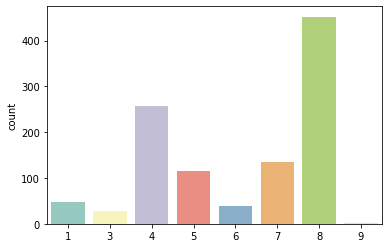

In [52]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [53]:
file_name = 'xgb_bands_only_mean'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

### Use the bands mean/ std, max, min only

In [55]:
dates = ["2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12", "2017-03-22", "2017-05-31", "2017-06-20", 
        "2017-07-10", "2017-07-15", "2017-08-04", "2017-08-19"]

features = ['red', 'green', 'blue', 'band5', 'band6', 'band7', 'nir', 'band8a', 'band11', 'band12',
           'ndvi', 'reip', 'datt3', 'gemi', 'msbi', 'ccci', 'avi', 'cvi', 'ndsi', 'siwsi', 'savi', 'evi', 'ndre']

reduced_columns = []
for date in dates:
    for layer in features:
        reduced_columns = reduced_columns + [layer + '_mean'+date, layer + '_sd'+date, layer + '_min'+date, layer + '_max'+date]
print(len(reduced_columns))

X_train = train[reduced_columns]
X_test = test[reduced_columns]
y_train = train['Crop_Id_Ne']

1012


Counter({8: 466, 4: 254, 7: 123, 5: 117, 1: 48, 6: 43, 3: 22, 9: 1})
(1074, 9)


,field_id,crop_id_1,crop_id_2,crop_id_3,crop_id_4,crop_id_5,crop_id_6,crop_id_7,crop_id_8,crop_id_9
0,5,0.002609,0.000376,0.006207,0.003737,0.003498,0.006664,0.002252,0.962056,0.012601
1,6,0.002148,0.000406,0.002441,0.004087,0.001498,0.013763,0.002802,0.947461,0.025392
2,10,0.003172,0.000515,0.009131,0.010512,0.001440,0.008885,0.003051,0.892029,0.071264
3,18,0.002063,0.000281,0.002231,0.004006,0.000941,0.005713,0.003694,0.968940,0.012131
4,23,0.000716,0.000716,0.001052,0.001751,0.000604,0.003393,0.002357,0.968391,0.021020
5,28,0.004325,0.001210,0.671001,0.033206,0.006957,0.015046,0.167332,0.091034,0.009889
6,32,0.001034,0.000218,0.000666,0.001761,0.000849,0.002763,0.002632,0.958651,0.031428
7,35,0.002665,0.000370,0.004531,0.005296,0.001922,0.006417,0.004114,0.954671,0.020014
8,43,0.003290,0.012448,0.071723,0.033775,0.007214,0.108482,0.507842,0.240411,0.014815
9,44,0.000587,0.001606,0.006817,0.008680,0.007979,0.020264,0.944483,0.005285,0.004298


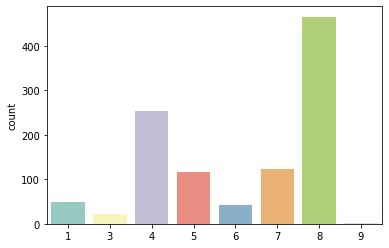

In [56]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

In [57]:
file_name = 'xgb_bands_only_mean_sd_min_max'
submission.to_csv('predictions/boosting/'+file_name+'.csv', index=False)

## Use the bands mean only

In [ ]:
dates = ["2017-01-01", "2017-01-31", "2017-02-10", "2017-03-12", "2017-03-22", "2017-05-31", "2017-06-20", 
        "2017-07-10", "2017-07-15", "2017-08-04", "2017-08-19"]

features = ['red', 'green', 'blue', 'band5', 'band6', 'band7', 'nir', 'band8a', 'band11', 'band12',
           'ndvi', 'reip', 'datt3', 'gemi', 'msbi', 'ccci', 'avi', 'cvi', 'ndsi', 'siwsi', 'savi', 'evi', 'ndre']

mean_columns = []
for date in dates:
    for layer in features:
        mean_columns.append(layer + '_mean'+date)
print(len(mean_columns))

Already tried 

In [ ]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
         gamma=0.0, max_delta_step=0.0, min_child_weight=1.0,
         missing=None, n_jobs=-1, objective='multi:softprob', random_state=42, reg_alpha=0.0,
         reg_lambda=1.0, scale_pos_weight=1.0, tree_method='auto', num_class = 9)
model.fit(X_train, y_train)

prob = model.predict_proba(X_test)
pred = model.predict(X_test)

predicted_classes = prob.argmax(1)+1
counter=collections.Counter(predicted_classes)
print(counter)
sns.countplot(predicted_classes, palette='Set3')

prob = pd.DataFrame(prob)
# prob = pd.DataFrame(get_prediction_from_np_array(test_predict))
prob.columns = ['crop_id_1', 'crop_id_2', 'crop_id_3', 'crop_id_4', 'crop_id_5', 'crop_id_6', 'crop_id_7','crop_id_8', 'crop_id_9']
print(prob.shape)

submission = pd.DataFrame()
submission['field_id'] = sample_sub['field_id']
submission = submission.join(prob)
submission.head(10)

## Use the distances only